In [1]:
import librosa
import scipy
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
# functions used

# copy of matlab buffer function
def buffer(signal, frame_size, overlap_size=0):
    step_size = frame_size - overlap_size
    total_frames = int(np.ceil(len(signal) / step_size))

    padded_length = total_frames * step_size + overlap_size
    padded_signal = np.append(signal, np.zeros(padded_length - len(signal)))

    frames = np.lib.stride_tricks.sliding_window_view(padded_signal, frame_size)[::step_size]

    return frames

In [3]:
fs, h1 = scipy.io.wavfile.read('HYD1.wav')
_,  h2 = scipy.io.wavfile.read('HYD2.wav')
_,  h3 = scipy.io.wavfile.read('HYD3.wav')

h1 = h1.astype(np.float32)/np.iinfo(h1.dtype).max
h2 = h2.astype(np.float32)/np.iinfo(h2.dtype).max
h3 = h3.astype(np.float32)/np.iinfo(h3.dtype).max

ts = np.arange(0, len(h1)/fs, 1/fs)

float32


In [29]:
win_size = 128
noverlap = np.ceil(win_size/10)

ts_buff = buffer(ts, win_size, noverlap.astype(np.int16))
ts_buff = ts_buff[:,0]

h2_buff = buffer(h2, win_size, noverlap.astype(np.int16))
h2_buff_pow = 20*np.log10(np.sqrt(np.mean(h2_buff**2,axis=1)))

dB_peak_thresh = 9
pk_distance = 5
h2_peaks, _ = scipy.signal.find_peaks(h2_buff_pow, prominence=dB_peak_thresh, distance=pk_distance)

Text(0, 0.5, 'Power [dBFS]')

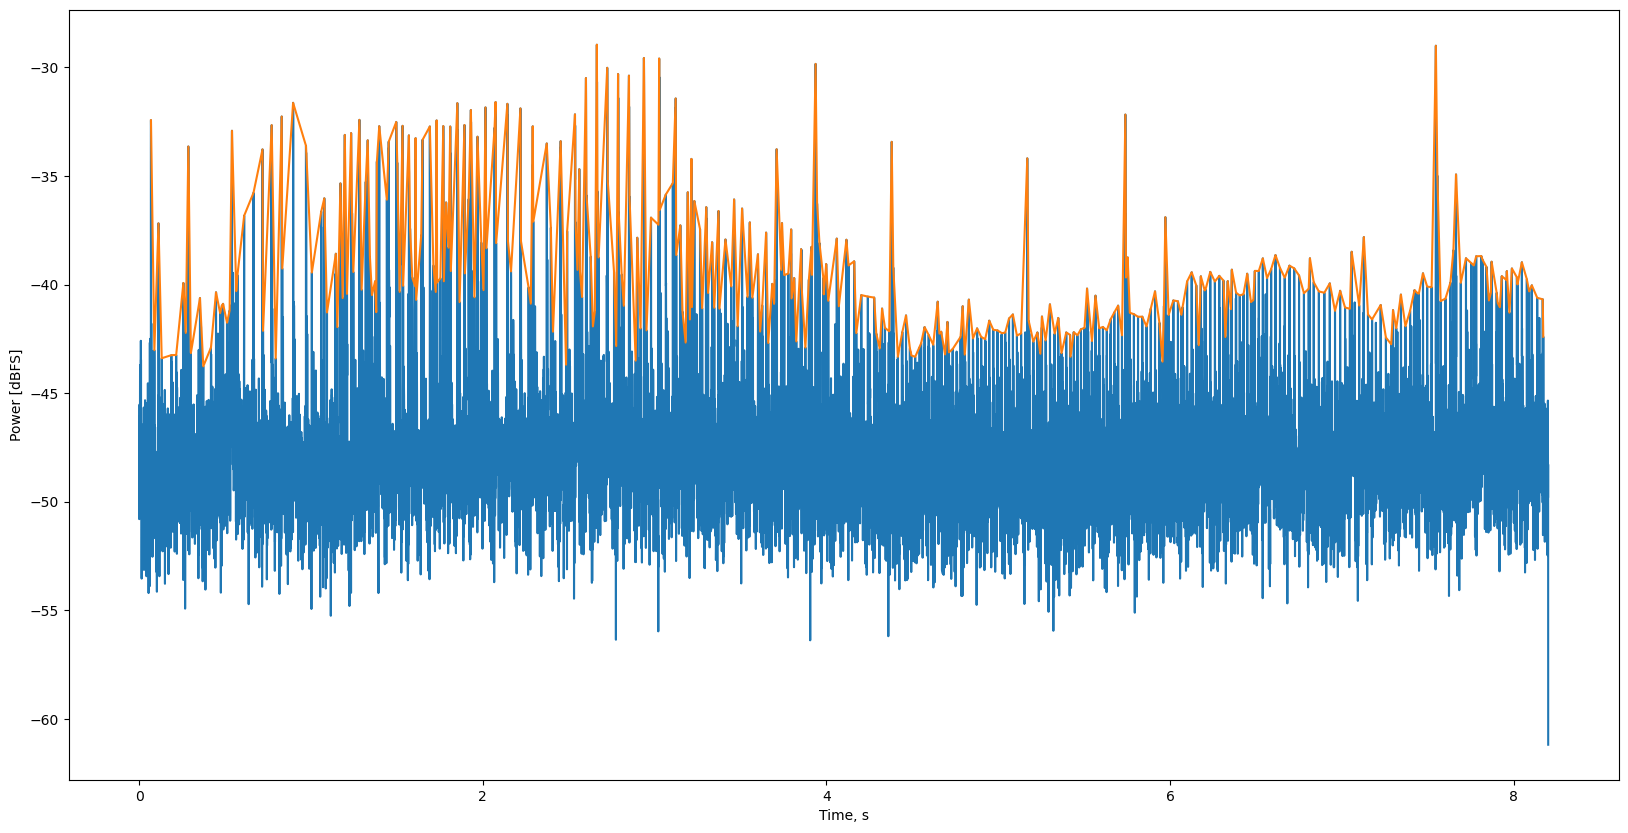

In [30]:
plt.figure()
plt.plot(ts_buff, h2_buff_pow)
plt.plot(ts_buff[h2_peaks], h2_buff_pow[h2_peaks])
plt.xlabel('Time, s')
plt.ylabel('Power [dBFS]')


In [31]:
click_cutoff = 4.5/(len(h2)/fs)

ts_buff_a = ts_buff[0:np.int16(np.floor(click_cutoff*len(ts_buff)))]
h2_buff_pow_a = h2_buff_pow[0:np.int16(np.floor(click_cutoff*len(h2_buff_pow)))]
h2_clicks_a = h2_buff_pow[h2_peaks[h2_peaks < click_cutoff*len(h2_buff_pow)]]
h2_click_ts_a = ts_buff[h2_peaks[h2_peaks < click_cutoff*len(h2_buff_pow)]]

ts_buff_b = ts_buff[np.int16(np.ceil(click_cutoff*len(ts_buff))):]
h2_buff_pow_b = h2_buff_pow[np.int16(np.ceil(click_cutoff*len(h2_buff_pow))):]
h2_clicks_b = h2_buff_pow[h2_peaks[h2_peaks > click_cutoff*len(h2_buff_pow)]]
h2_click_ts_b = ts_buff[h2_peaks[h2_peaks > click_cutoff*len(h2_buff_pow)]]



Text(0, 0.5, 'Power, dBFS')

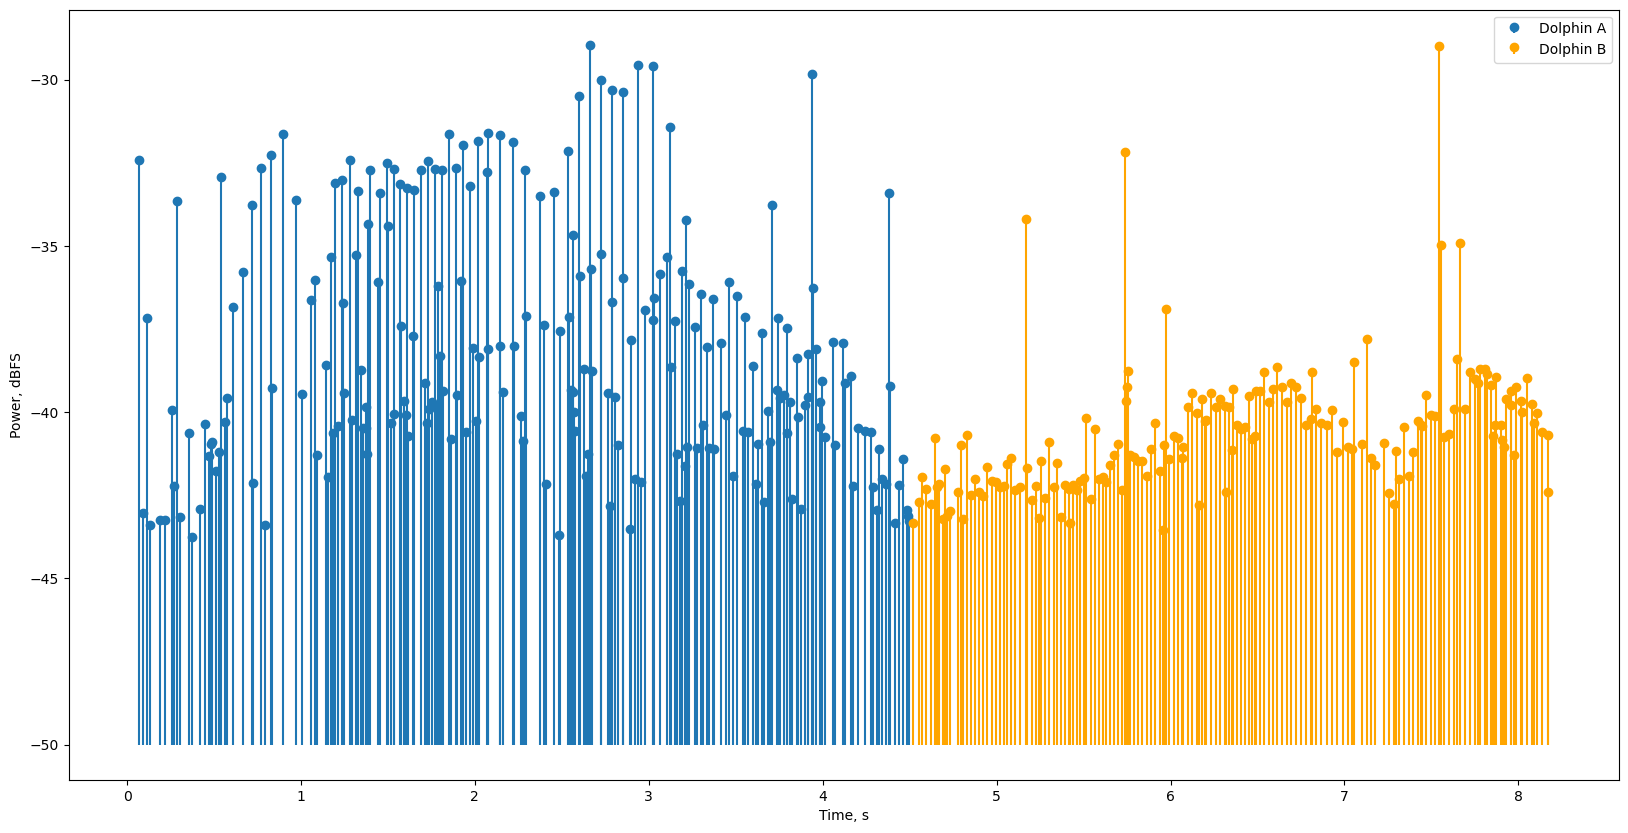

In [32]:
plt.figure()
plt.stem(h2_click_ts_a, h2_clicks_a, bottom=-50, basefmt='None')
plt.stem(h2_click_ts_b, h2_clicks_b, bottom=-50, linefmt='orange', basefmt='None')
plt.legend(['Dolphin A', 'Dolphin B'])
plt.xlabel('Time, s')
plt.ylabel('Power, dBFS')

(226,)


Text(0.5, 1.0, 'Interclick Interval by Click, Total Number of Clicks: A: 225 B: 173\nMean ICI: A: 19.665511111111112 B: 21.128092485549136\nStd. Dev. ICI: A: 14.838486231002644 B: 8.399177179119613')

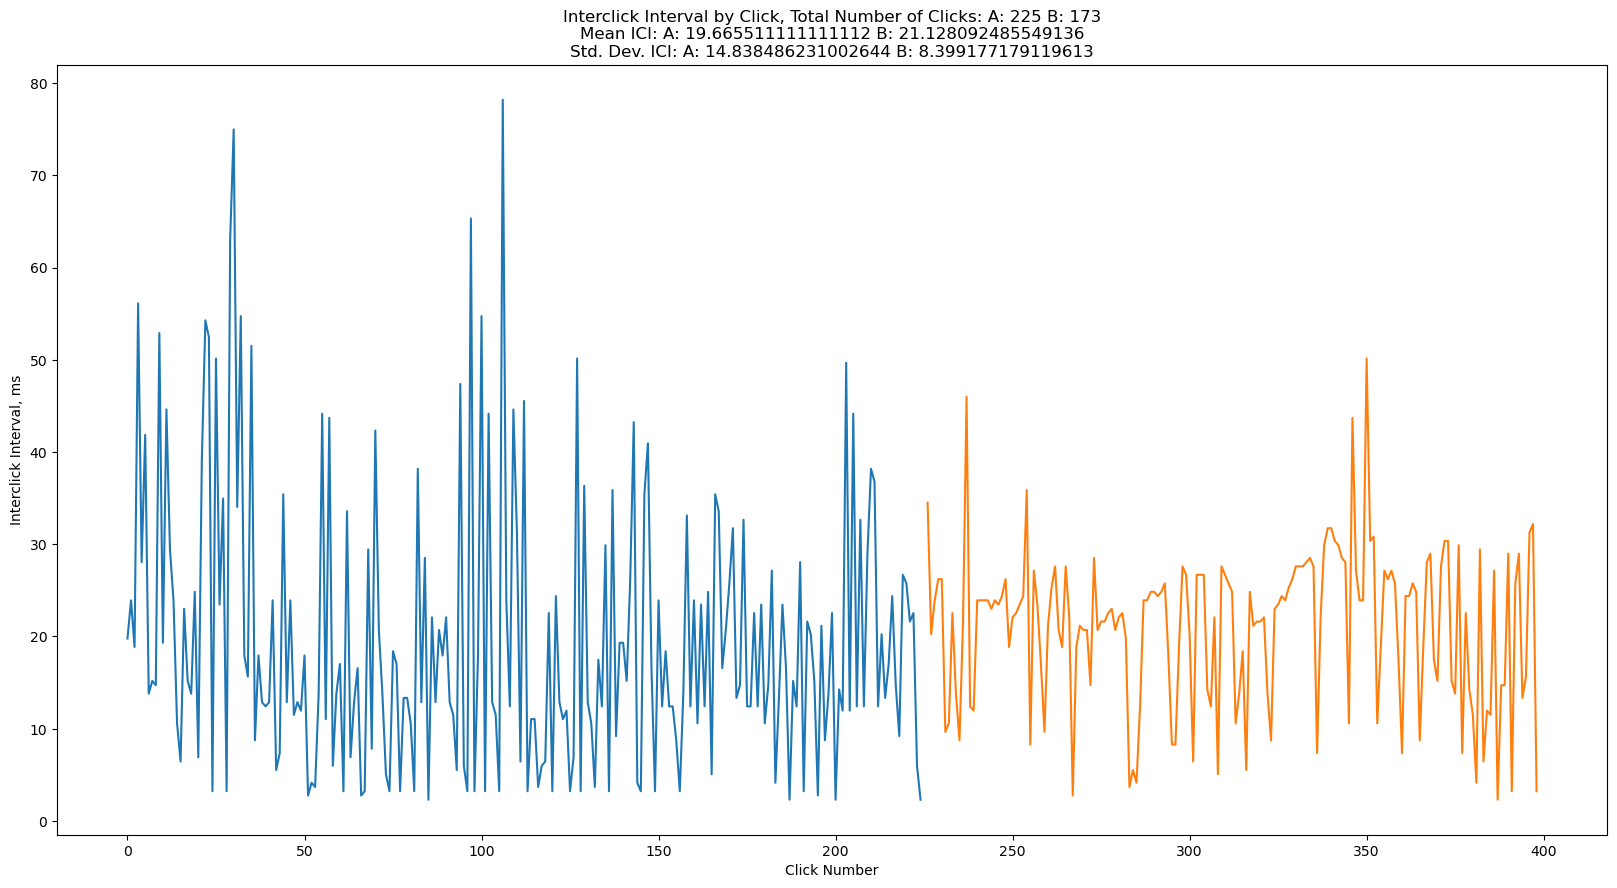

In [33]:
print(h2_click_ts_a.shape)
ici_a = np.diff(h2_click_ts_a)*1000
ici_b = np.diff(h2_click_ts_b)*1000

plt.figure()
plt.plot(np.arange(0,len(ici_a)), ici_a)
plt.plot(np.arange(len(ici_a)+1,len(ici_b)+len(ici_a)+1), ici_b)
plt.ylabel('Interclick Interval, ms')
plt.xlabel('Click Number')
plt.title('Interclick Interval by Click, Total Number of Clicks: ' + 'A: ' + str(len(ici_a)) + ' B: ' + str(len(ici_b)) + '\n'
          + 'Mean ICI: A: ' + str(np.mean(ici_a)) + ' B: ' + str(np.mean(ici_b)) + '\n'
          + 'Std. Dev. ICI: A: ' + str(np.std(ici_a)) + ' B: ' + str(np.std(ici_b)))

##TASK 2

In [105]:
d = 14  # meters, separating hydrophones
c = 1520  # m/s, speed of sound in water
max_td = d/c

win_size = 256
noverlap = np.ceil(win_size/10)

dB_peak_thresh = 12
pk_distance = 5
click_cutoff = 4.5 / (len(h2) / fs)

[1.64128 1.65692]
[0.06624]
[]
[0.28612]
[0.54004]
[0.61824]
[0.67344]
[0.72588]
[0.77924]
[0.8372]
[0.90436]
[0.97888]
[1.0672]
[]
[1.17116]
[1.19692]
[1.23372]
[1.28156]
[]
[1.3294]
[1.38276]
[1.40484]
[1.44164]
[1.46096]
[1.50144]
[1.50144]
[1.541]
[1.57688]
[1.61644]
[1.64128 1.65692]
[1.69924]
[1.7388]
[1.77744]
[1.81792]
[1.85104 1.85932]
[1.8998]
[1.93752]
[1.97616]
[2.02216]
[2.0608]
[2.08196]
[2.15004]
[2.2264]
[2.29816]
[2.37912]
[2.46008]
[2.48952]
[2.5438]
[2.60728]
[2.67076]
[2.72044 2.73148]
[2.79404]
[2.85752]
[2.94492]
[2.97712]
[3.02036 3.03324]
[3.0636]
[3.10408]
[3.12984]
[3.14824]
[3.19148]
[3.22092]
[3.2292]
[3.36996]
[3.46104]
[3.50704]
[3.55212]
[]
[3.92932 3.93944]
[4.05812]
[4.11424]
[4.15932]


ValueError: setting an array element with a sequence.

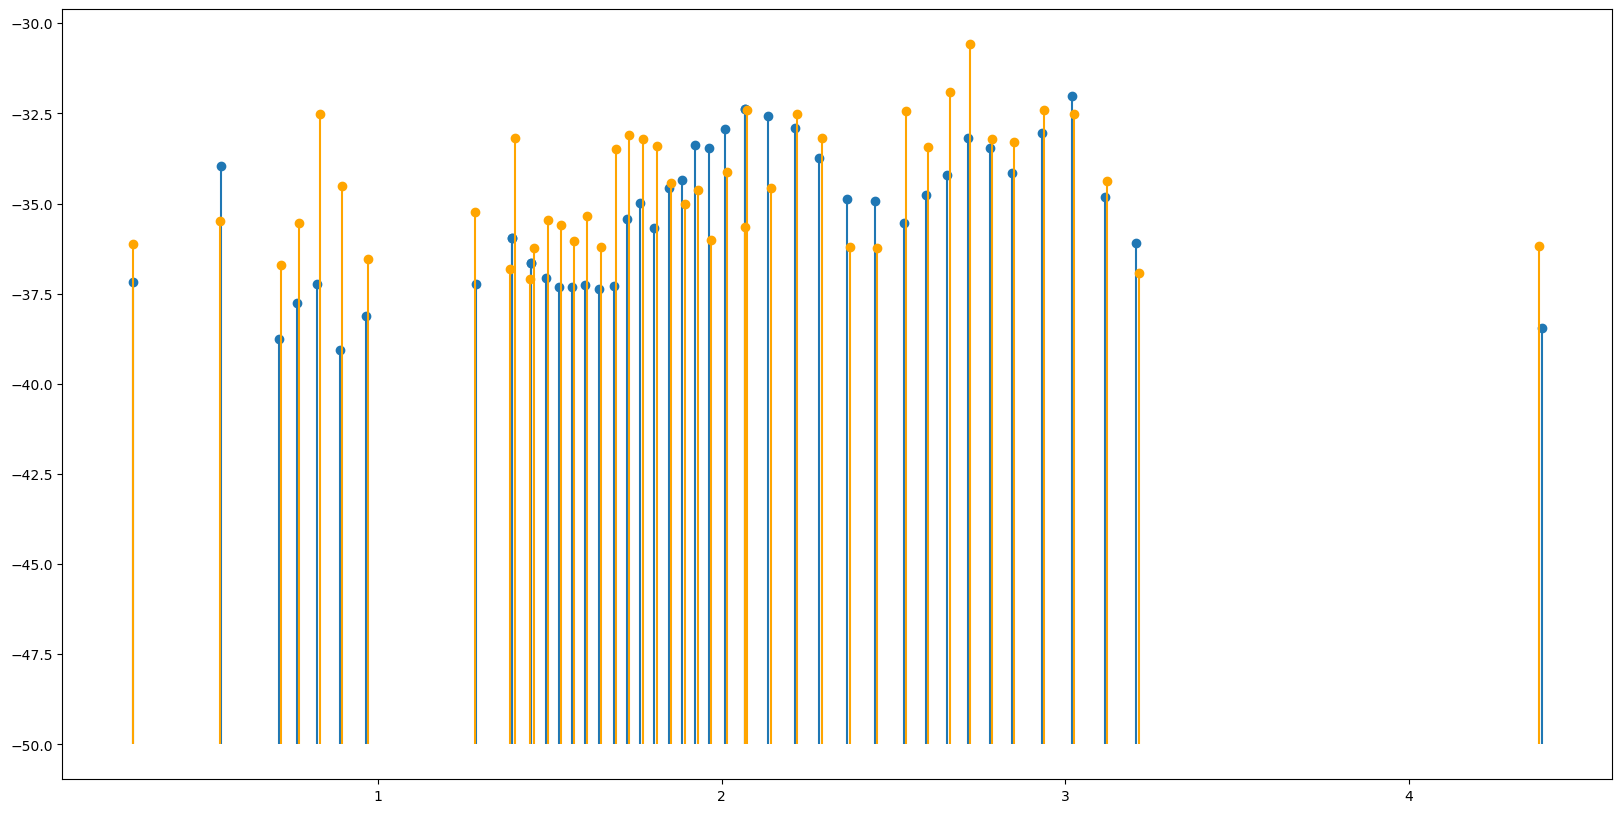

In [111]:
def find_clicks(sig, ts, win_size, noverlap, click_cutoff, dB_peak_thresh, pk_distance):
    ts_buff = buffer(ts, win_size, noverlap.astype(np.int16))
    ts_buff = ts_buff[:,0]
    ts_buff_a = ts_buff[0:np.int16(np.floor(click_cutoff * len(ts_buff)))]
    ts_buff_b = ts_buff[np.int16(np.ceil(click_cutoff * len(ts_buff))):]
    sig_buff = buffer(sig, win_size, noverlap.astype(np.int16))
    sig_buff_pow = 20*np.log10(np.sqrt(np.mean(sig_buff**2,axis=1)))
    sig_peaks, _ = scipy.signal.find_peaks(sig_buff_pow, prominence=dB_peak_thresh, distance=pk_distance)
    sig_buff_pow_a = sig_buff_pow[0:np.int16(np.floor(click_cutoff * len(sig_buff_pow)))]
    clicks_a = sig_buff_pow[sig_peaks[sig_peaks < click_cutoff * len(sig_buff_pow)]]
    click_ts_a = ts_buff[sig_peaks[sig_peaks < click_cutoff * len(sig_buff_pow)]]
    buff_pow_b = sig_buff_pow[np.int16(np.ceil(click_cutoff * len(sig_buff_pow))):]
    clicks_b = sig_buff_pow[sig_peaks[sig_peaks > click_cutoff * len(sig_buff_pow)]]
    click_ts_b = ts_buff[sig_peaks[sig_peaks > click_cutoff * len(sig_buff_pow)]]

    return clicks_a, click_ts_a, clicks_b, click_ts_b

[h1_clicks_a, h1_click_ts_a, h1_clicks_b, h1_click_ts_b] = find_clicks(h1, ts, win_size, noverlap, click_cutoff, dB_peak_thresh, pk_distance)
[h2_clicks_a, h2_click_ts_a, h2_clicks_b, h2_click_ts_b] = find_clicks(h2, ts, win_size, noverlap, click_cutoff, dB_peak_thresh, pk_distance)
[h3_clicks_a, h3_click_ts_a, h3_clicks_b, h3_click_ts_b] = find_clicks(h3, ts, win_size, noverlap, click_cutoff, dB_peak_thresh, pk_distance)

h1_click_ts_within = []
h2_click_ts_within = []
h3_click_ts_within = []
h1_clicks_within = []
h2_clicks_within = []
h3_clicks_within = []
for click_t in h2_click_ts_a:
    # print(max_td >= np.abs(h1_click_ts_a - click_t) > 0)
    cur_h1_clicks = h1_click_ts_a[max_td >= np.abs(h1_click_ts_a - click_t)]
    print(cur_h3_clicks)
    cur_h3_clicks = h3_click_ts_a[max_td >= np.abs(h3_click_ts_a - click_t)]
    if cur_h1_clicks.size and cur_h3_clicks.size:
        h1_click_ts_within.append(cur_h1_clicks)
        h2_click_ts_within.append(click_t)
        h3_click_ts_within.append(cur_h3_clicks)
        h1_clicks_within.append(h1_clicks_a[h1_click_ts_a == cur_h1_clicks[0]])
        h2_clicks_within.append(h2_clicks_a[h2_click_ts_a == click_t])
        h3_clicks_within.append(h3_clicks_a[h3_click_ts_a == cur_h3_clicks[0]])

# h1_click_ts_within = np.ndarray(h1_click_ts_within)
# # h2_click_ts_within = []
# # h3_click_ts_within = []
# h1_clicks_within = np.ndarray(h1_clicks_within)
# # h2_clicks_within = []
# # h3_clicks_within = []

# print(list(h1_clicks_within))
plt.figure()
plt.stem(h1_click_ts_within, h1_clicks_within, bottom=-50, basefmt='None')
plt.stem(h2_click_ts_within,h2_clicks_within, bottom=-50, linefmt='orange', basefmt='None')
plt.stem(h3_click_ts_within,h3_clicks_within, bottom=-50, linefmt='green', basefmt='None')
plt.legend(['H1', 'H2'])
plt.xlabel('Time, s')
plt.ylabel('Power, dBFS')

print(len(h1_clicks_a), len(h2_clicks_a), len(h3_clicks_a))